## Imports

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split  
from sklearn.feature_selection import VarianceThreshold
%matplotlib inline

In [33]:
fifa_data = pd.read_csv('new_data.csv')

In [34]:
cols =  ['Preferred Foot', 'Body Type' , 'Work Rate', 'Position']
for col in cols:
    fifa_data[col] = fifa_data[col].astype('category')

In [35]:
fifa_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16122 entries, 0 to 16121
Data columns (total 66 columns):
Age                         16122 non-null int64
Potential                   16122 non-null int64
Preferred Foot              16122 non-null category
International Reputation    16122 non-null float64
Weak Foot                   16122 non-null float64
Skill Moves                 16122 non-null float64
Work Rate                   16122 non-null category
Body Type                   16122 non-null category
Position                    16122 non-null category
Height                      16122 non-null float64
Weight                      16122 non-null float64
LS                          16122 non-null int64
ST                          16122 non-null int64
RS                          16122 non-null int64
LW                          16122 non-null int64
LF                          16122 non-null int64
CF                          16122 non-null int64
RF                          16122 no

In [36]:
drop_columns = ['International Reputation'] 
fifa_data.drop(columns=drop_columns, inplace=True)

In [37]:
target = fifa_data['Position']
fifa_data = fifa_data.drop('Position', axis=1)
fifa_no_category = fifa_data.select_dtypes(exclude=['category'])

### Removing Constant features

In [38]:
constant_filter = VarianceThreshold(threshold=0)

In [39]:
constant_filter.fit(fifa_no_category)

VarianceThreshold(threshold=0)

In [40]:
selected_features =  fifa_no_category.columns[constant_filter.get_support()]
constant_features = [feature for feature in fifa_no_category if feature not in selected_features]
constant_features

[]

### wynik wskazuje że brak stałycj cech w zbiorze

### Removing Quasi-Constant features

In [41]:
VARIANCE_THRESHHOLD = 0.2
qconstant_filter = VarianceThreshold(threshold=VARIANCE_THRESHHOLD)
qconstant_filter.fit(fifa_no_category)
selected_features =  fifa_no_category.columns[qconstant_filter.get_support()]
qconstant_features = [feature for feature in fifa_no_category if feature not in selected_features]
qconstant_features

[]

### wynik wskazuje że brak kwazi-stałycj cech w zbiorze

### Usuwanie Cech dublikatów

In [42]:
fifa_data.shape

(16122, 64)

In [43]:
fifa_T = fifa_data.T

In [44]:
fifa_T.shape

(64, 16122)

In [45]:
fifa_T_no_duplictes = fifa_T.drop_duplicates(keep='first')

In [46]:
fifa_T_no_duplictes.shape

(48, 16122)

In [47]:
fifa_no_duplictes_features = fifa_T_no_duplictes.T

In [48]:
fifa_no_duplictes_features.columns

Index(['Age', 'Potential', 'Preferred Foot', 'Weak Foot', 'Skill Moves',
       'Work Rate', 'Body Type', 'Height', 'Weight', 'LS', 'LW', 'LF', 'LAM',
       'LM', 'LCM', 'LWB', 'LDM', 'LB', 'LCB', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle'],
      dtype='object')

In [49]:
duplictes_features = [feature for feature in fifa_data.columns if feature not in 
                                                                  fifa_no_duplictes_features.columns ] 
duplictes_features

['ST',
 'RS',
 'CF',
 'RF',
 'RW',
 'CAM',
 'RAM',
 'CM',
 'RCM',
 'RM',
 'CDM',
 'RDM',
 'RWB',
 'CB',
 'RCB',
 'RB']

### Usuwamy cechi zdublowane

In [50]:
fifa_data.drop(columns=duplictes_features, axis=1, inplace=True)

In [51]:
fifa_data.shape

(16122, 48)

### Removing Correlated Features

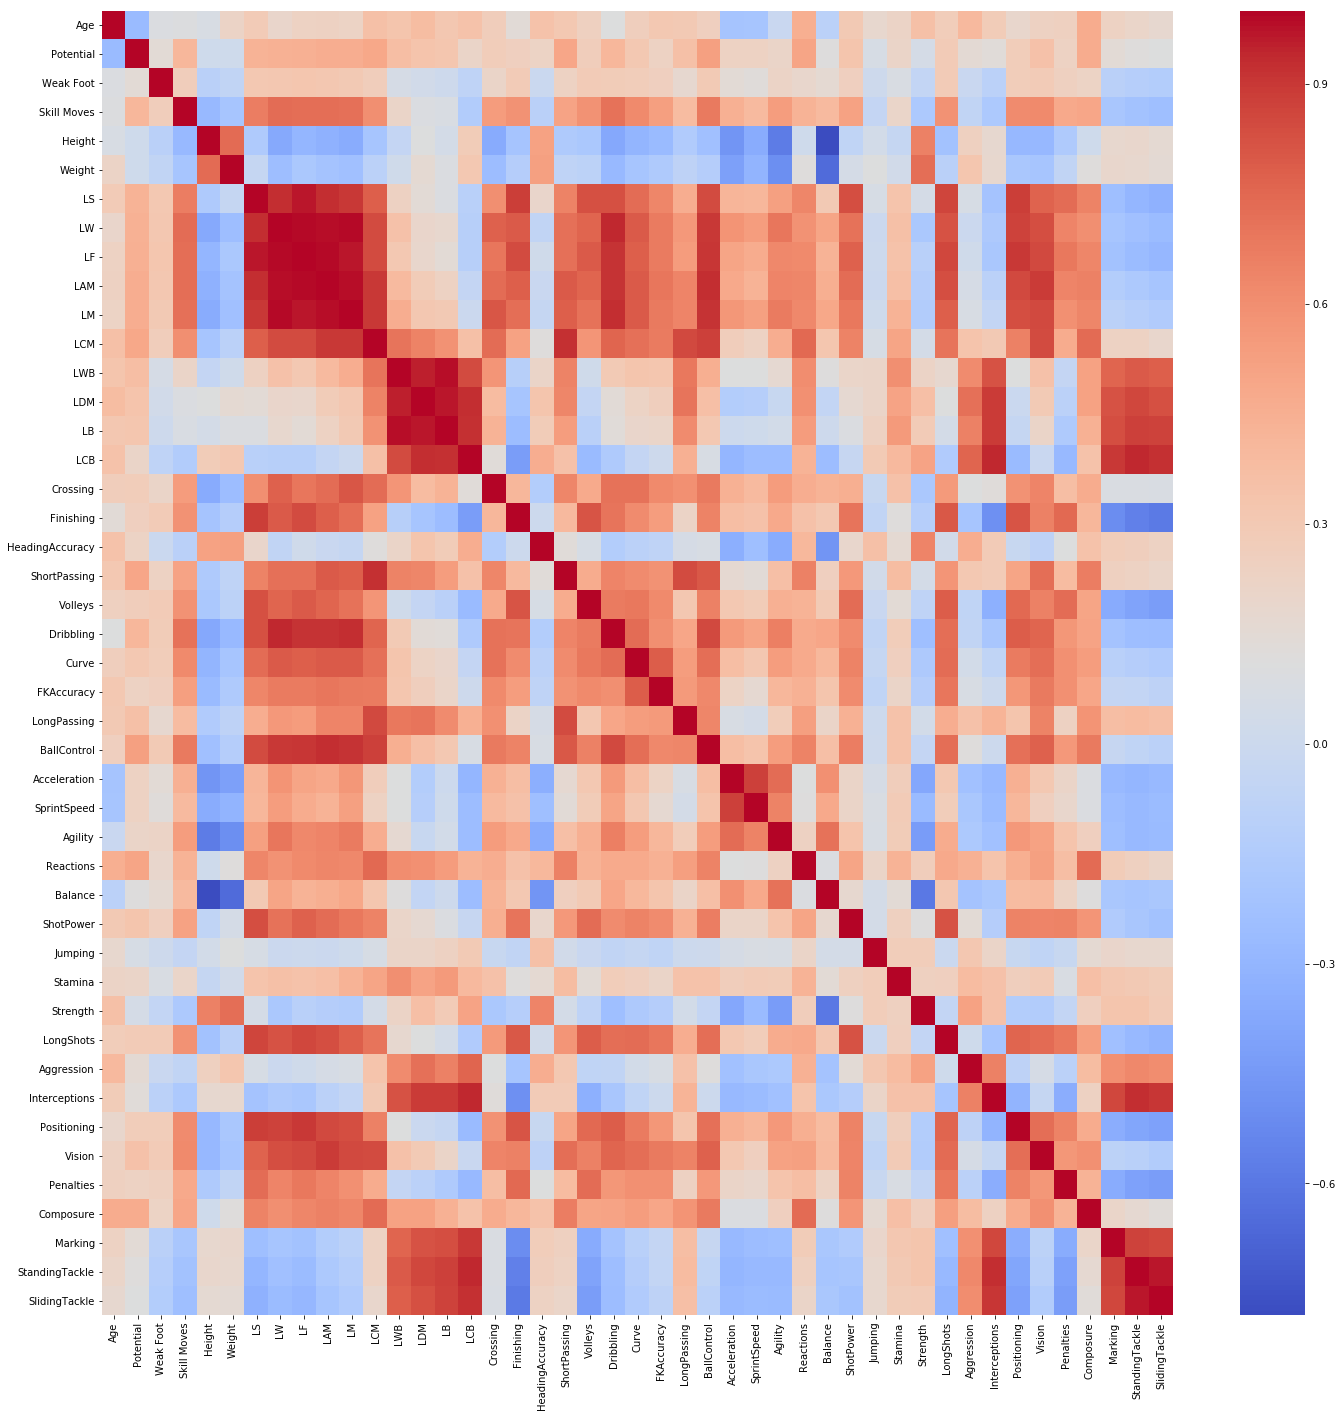

In [52]:
corr = fifa_data.corr()

plt.figure(figsize=(24,24))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap='coolwarm')

In [53]:
CORRELATION_THRESHLOD = 0.7
correlated_features = set()
for i in range(len(corr.columns)):  
    for j in range(i):
        if abs(corr.iloc[i, j]) > CORRELATION_THRESHLOD:
            colname = corr.columns[i]
            correlated_features.add(colname)

In [54]:
len(correlated_features)

35

In [55]:
correlated_features

{'Aggression',
 'Agility',
 'Balance',
 'BallControl',
 'Composure',
 'Crossing',
 'Curve',
 'Dribbling',
 'FKAccuracy',
 'Finishing',
 'Interceptions',
 'LAM',
 'LB',
 'LCB',
 'LCM',
 'LDM',
 'LF',
 'LM',
 'LW',
 'LWB',
 'LongPassing',
 'LongShots',
 'Marking',
 'Penalties',
 'Positioning',
 'Reactions',
 'ShortPassing',
 'ShotPower',
 'SlidingTackle',
 'SprintSpeed',
 'StandingTackle',
 'Strength',
 'Vision',
 'Volleys',
 'Weight'}

In [56]:
new_fifa_data = fifa_data.drop(columns=correlated_features, axis=1)

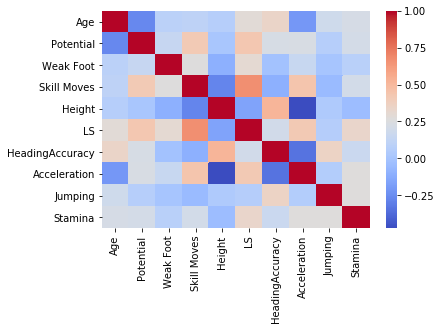

In [57]:
sns.heatmap(new_fifa_data.corr(), cmap='coolwarm')

In [64]:
new_fifa_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16122 entries, 0 to 16121
Data columns (total 13 columns):
Age                16122 non-null int64
Potential          16122 non-null int64
Preferred Foot     16122 non-null category
Weak Foot          16122 non-null float64
Skill Moves        16122 non-null float64
Work Rate          16122 non-null category
Body Type          16122 non-null category
Height             16122 non-null float64
LS                 16122 non-null int64
HeadingAccuracy    16122 non-null float64
Acceleration       16122 non-null float64
Jumping            16122 non-null float64
Stamina            16122 non-null float64
dtypes: category(3), float64(7), int64(3)
memory usage: 1.3 MB


In [95]:
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

In [67]:
label_encoder = LabelEncoder()

In [70]:
fifa_categories = new_fifa_data.select_dtypes('category')

In [77]:
def encode_labels(col):
    return label_encoder.fit_transform(col)

In [81]:
new_fifa_data[fifa_categories.columns] = new_fifa_data[fifa_categories.columns].apply(encode_labels)

In [85]:
 X_train, X_test, y_train, y_test = train_test_split(
        new_fifa_data, target, test_size=0.33, random_state=42)

In [86]:
decision_tree_model = tree.DecisionTreeClassifier()

In [87]:
new_fifa_data.head()

,Age,Potential,Preferred Foot,Weak Foot,Skill Moves,Work Rate,Body Type,Height,LS,HeadingAccuracy,Acceleration,Jumping,Stamina
0,31,94,0,4.0,4.0,8,1,170.18,88,70.0,91.0,68.0,72.0
1,33,94,1,4.0,5.0,1,1,187.96,91,89.0,89.0,95.0,88.0
2,26,93,1,5.0,5.0,2,1,175.26,84,62.0,94.0,61.0,81.0
3,27,92,1,5.0,4.0,0,1,180.34,82,55.0,78.0,63.0,90.0
4,27,91,1,4.0,4.0,2,1,172.72,83,61.0,94.0,56.0,83.0


In [92]:
decision_tree_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [93]:
pred = decision_tree_model.predict(X_test)

In [94]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

          CB       0.50      0.48      0.49       581
          CF       0.00      0.00      0.00        20
          CM       0.40      0.35      0.37      1138
          LB       0.47      0.50      0.48       659
          LF       0.10      0.11      0.11       194
          LM       0.17      0.20      0.19       546
          RB       0.39      0.40      0.39       677
          RF       0.13      0.14      0.14       195
          RM       0.18      0.18      0.18       608
          ST       0.47      0.47      0.47       703

   micro avg       0.35      0.35      0.35      5321
   macro avg       0.28      0.28      0.28      5321
weighted avg       0.36      0.35      0.35      5321



In [98]:
forest = RandomForestClassifier(n_estimators=100)

In [99]:
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [100]:
forest_pred = forest.predict(X_test)

In [101]:
print(classification_report(y_test, forest_pred))

              precision    recall  f1-score   support

          CB       0.56      0.68      0.61       581
          CF       0.00      0.00      0.00        20
          CM       0.46      0.61      0.52      1138
          LB       0.60      0.61      0.61       659
          LF       0.05      0.01      0.01       194
          LM       0.24      0.18      0.20       546
          RB       0.49      0.50      0.50       677
          RF       0.12      0.02      0.03       195
          RM       0.26      0.15      0.19       608
          ST       0.55      0.73      0.63       703

   micro avg       0.48      0.48      0.48      5321
   macro avg       0.33      0.35      0.33      5321
weighted avg       0.43      0.48      0.44      5321



/home/mikita/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [106]:
len([p for p in target if p == 'CF'])

74

In [107]:
len(target)

16122

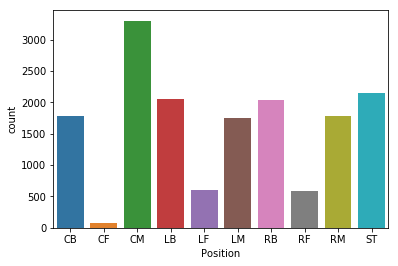

In [108]:
sns.countplot(target)